<a href="https://colab.research.google.com/github/mann09/cds_mini_projects/blob/main/M2_MP4_Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project Notebook: Employee Attrition Prediction

## Problem Statement

To predict employee attrition using CatBoost and XgBoost

## Learning Objectives

At the end of the experiment, you will be able to

* explore the employee attrition dataset
* apply CatBoost and XgBoost on the dataset
* tune the model hyperparameters to improve accuracy
* evaluate the model using suitable metrics


## Introduction

Employee attrition is the gradual reduction in employee numbers. Employee attrition happens when the size of your workforce diminishes over time. This means that employees are leaving faster than they are hired. Employee attrition happens when employees retire, resign, or simply aren't replaced.
Although employee attrition can be company-wide, it may also be confined to specific parts of a business.

Employee attrition can happen for several reasons. These include unhappiness about employee benefits or the pay structure, a lack of employee development opportunities, and even poor conditions in the workplace.

To know more about the factors that lead to employee attrition, refer [here](https://www.betterup.com/blog/employee-attrition#:~:text=Employee%20attrition%20is%20the%20gradual,or%20simply%20aren't%20replaced).


**Gradient Boosted Decision Trees**

* Gradient boosted decision trees (GBDTs) are one of the most important machine learning models.

* GBDTs originate from AdaBoost, an algorithm that ensembles weak learners and uses the majority vote, weighted by their individual accuracy, to solve binary classification problems. The weak learners in this case are decision trees with a single split, called decision stumps.

* Some of the widely used gradient boosted decision trees are XgBoost, CatBoost and LightGBM.

## Dataset

The dataset used for this mini-project is [HR Employee Attrition dataset](https://data.world/aaizemberg/hr-employee-attrition). This dataset is synthetically created by IBM data scientists. There are 35 features and 1470 records.

There are numerical features such as:

* Age
* DistanceFromHome
* EmployeeNumber
* PerformanceRating

There are several categorical features such as:
* JobRole
* EducationField
* Department
* BusinessTravel

Dependent or target feature is 'attrition' which has values as Yes/No.

In [ ]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/MiniProjects/hr_employee_attrition_train.csv
print("Data Downloaded Successfuly!!")

Data Downloaded Successfuly!!


### Install CatBoost

In [ ]:
!pip -qq install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.5 MB/s eta 0:00:00


### Import Required Packages

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier, metrics
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
%matplotlib inline

## Load the Dataset

**Exercise 1: Read the dataset [0.5 Mark]**

**Hint:** pd.read_csv()

In [ ]:
# read the dataset
# YOUR CODE HERE
data = pd.read_csv('hr_employee_attrition_train.csv')


In [ ]:
# Check the shape of dataframe.
# YOUR CODE HERE
data.shape

(1170, 35)

In [ ]:
data.columns

Index(['age', 'businesstravel', 'dailyrate', 'department', 'distancefromhome',
       'education', 'educationfield', 'employeecount', 'employeenumber',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'over18',
       'overtime', 'percentsalaryhike', 'performancerating',
       'relationshipsatisfaction', 'standardhours', 'stockoptionlevel',
       'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
       'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager', 'attrition'],
      dtype='object')

There can be more than one file to read as this is introduced as a competition, dataset has one file for training the model. Their can be other files as one containing the test features and the other can be the true labels.

## Data Exploration

- Check for missing values
- Check for consistent data type across a feature
- Check for outliers or inconsistencies in data columns
- Check for correlated features
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships? Making correlation heatmaps makes it easy to identify possible collinearity

**Exercise 2: Create a `List` of numerical and categorical columns. Display a statistical description of the dataset. Remove missing values (if any) [0.5 Mark]**

**Hint:** Use `for` to iterate through each column.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# List of numerical and categorical columns
numerical_columns = ['age', 'dailyrate', 'distancefromhome', 'education', 'employeenumber', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel',
    'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',  'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
    'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',   'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
    'yearswithcurrmanager']

categorical_columns = ['businesstravel', 'department', 'educationfield', 'gender', 'jobrole',
    'maritalstatus', 'overtime', 'stockoptionlevel']

# Explore independent variable distributions relative to the target label
for feature in numerical_columns:
    plt.figure(figsize=(8, 3))
    sns.histplot(data=data, x=feature, hue='attrition', multiple='stack', bins=10)
    plt.title(f'{feature} Distribution by Attrition', fontsize=8)
    plt.show()


In [ ]:
# YOUR CODE HERE

# Separate numerical and categorical columns
numerical_columns
categorical_columns

# Display statistical description of the dataset
desc = data.describe()

data_cleaned = data.dropna()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)
print("Data Stats Description:")
print(desc)
print("Cleaned Data Shape:", data_cleaned.shape)

Numerical Columns: ['age', 'dailyrate', 'distancefromhome', 'education', 'employeenumber', 'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel', 'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked', 'percentsalaryhike', 'performancerating', 'relationshipsatisfaction', 'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion', 'yearswithcurrmanager']
Categorical Columns: ['businesstravel', 'department', 'educationfield', 'gender', 'jobrole', 'maritalstatus', 'overtime', 'stockoptionlevel']
Data Stats Description:
               age    dailyrate  distancefromhome    education  employeecount  \
count  1170.000000  1170.000000       1170.000000  1170.000000         1170.0   
mean     36.858120   797.822222          9.262393     2.917949            1.0   
std       9.183448   403.592661          8.150868     1.011534            0.0   
min      18.000000   102.000000          1.000000

First, we want to get a sense of our data:
- What features have the most divergent distributions based on target class
- Do we have a target label imbalance
- How our independent variables are distributed relative to our target label
- Are there features that have strong linear or monotonic relationships, making correlation heatmaps makes it easy to identify possible colinearity

### Check for outliers

**Exercise 3: Create a box plot to check for outliers [0.5 Mark]**

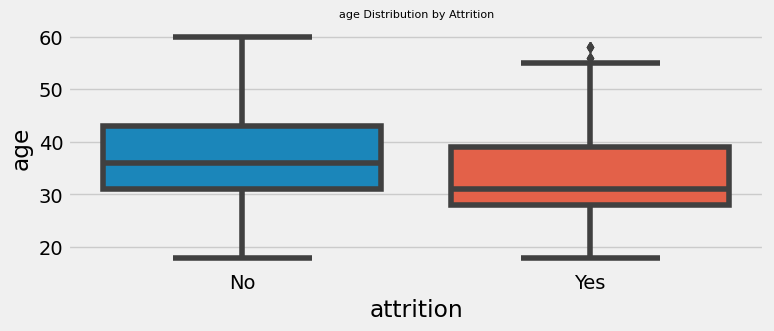

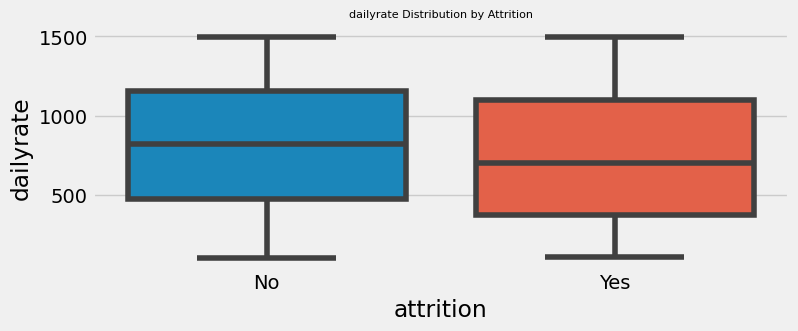

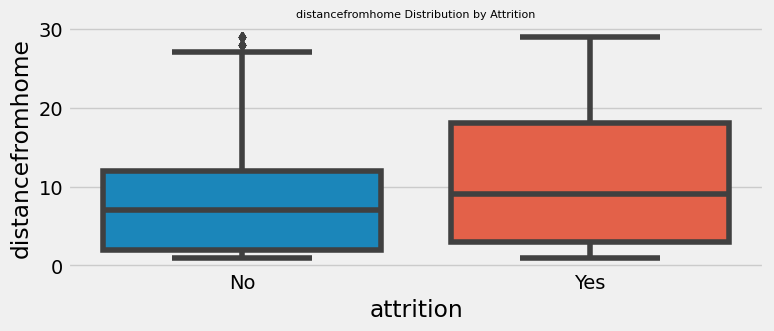

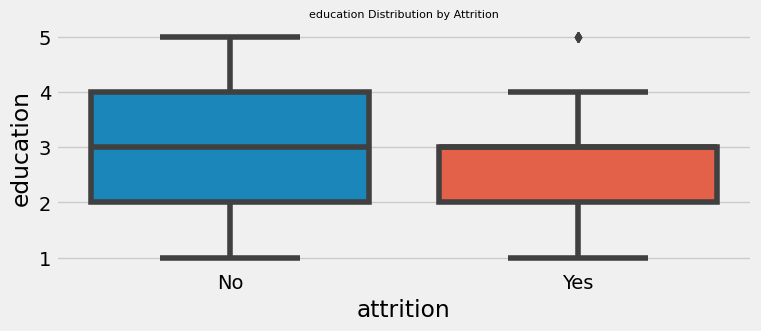

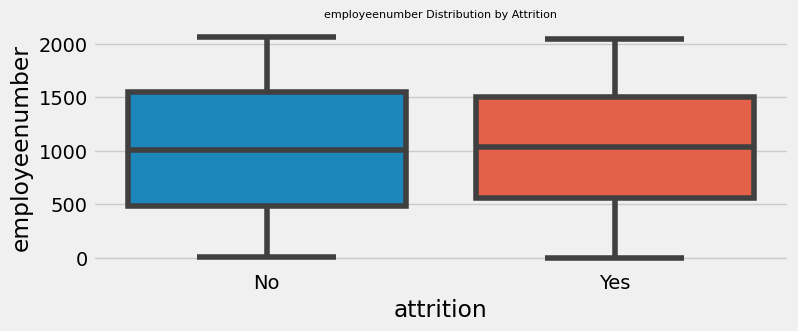

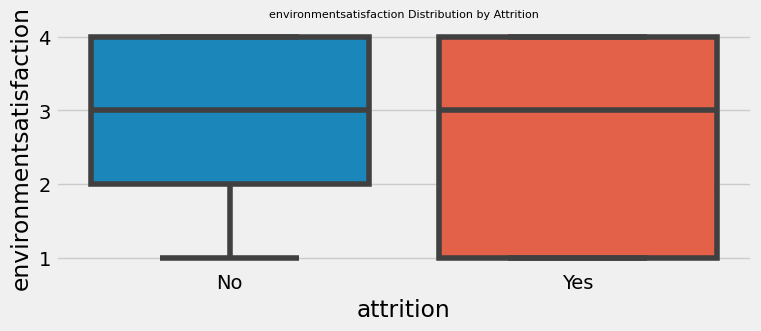

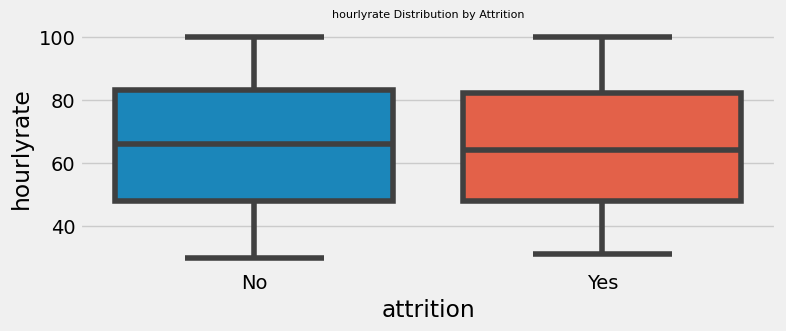

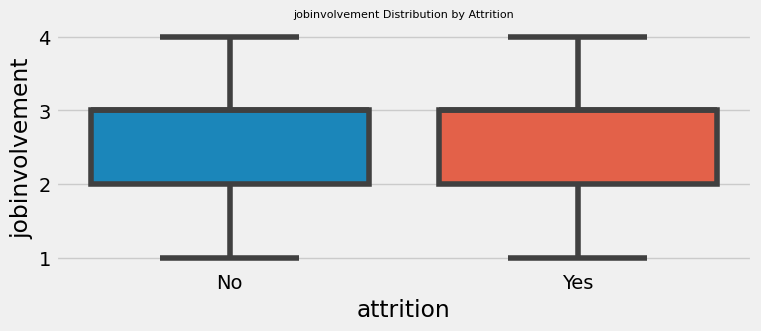

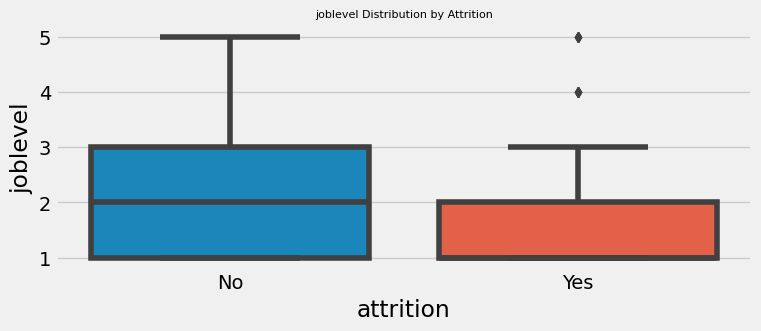

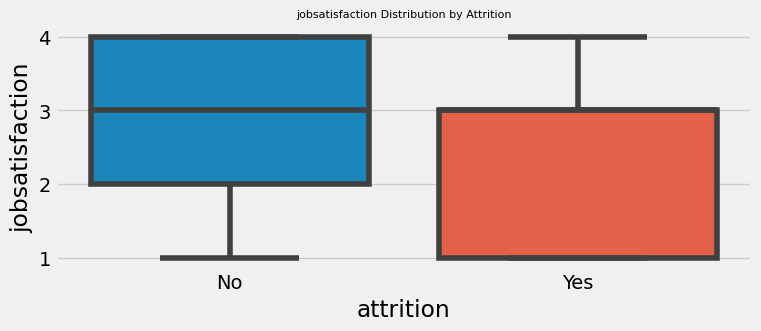

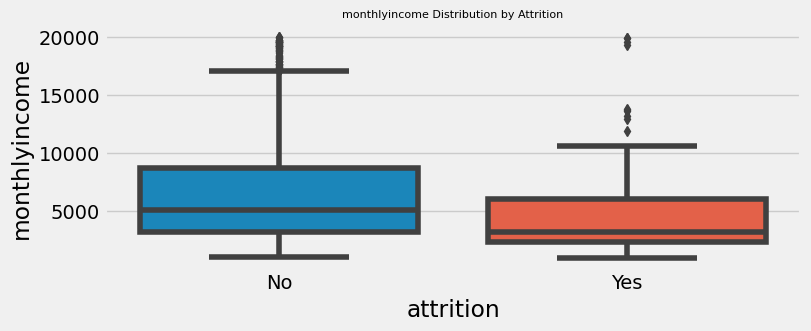

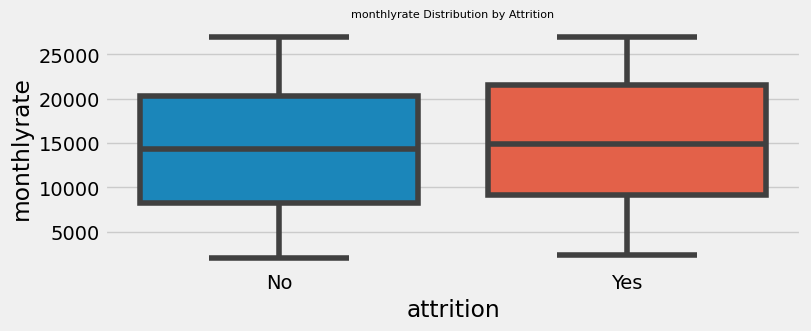

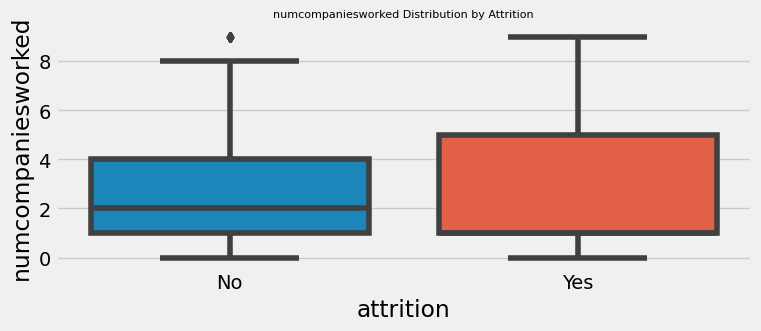

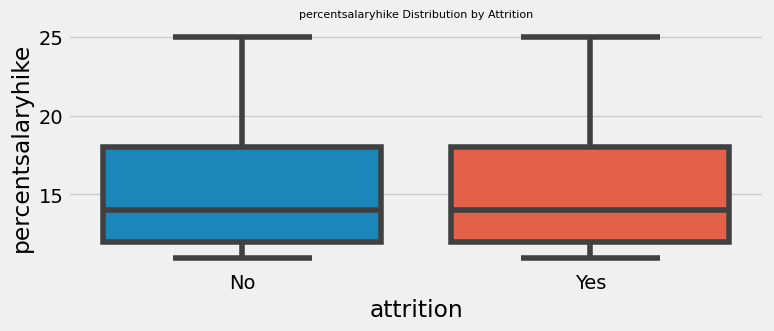

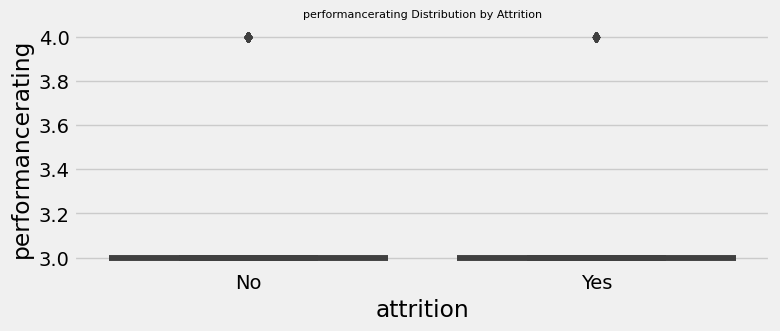

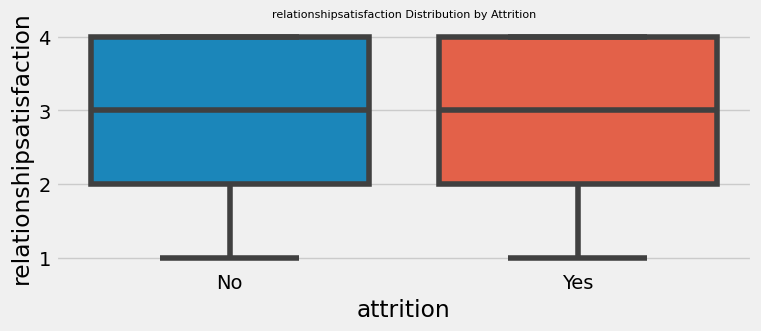

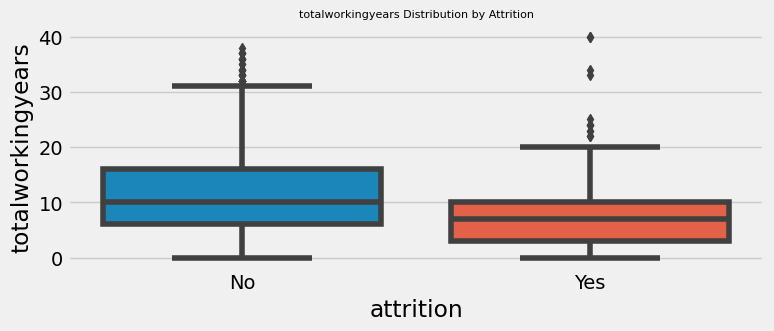

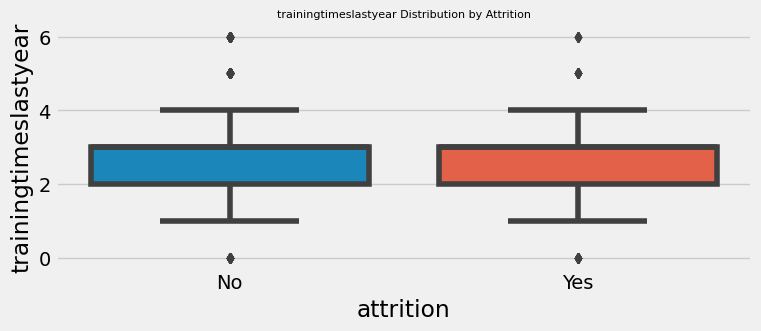

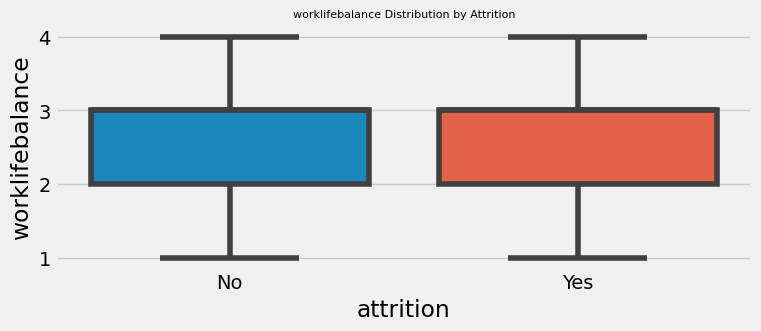

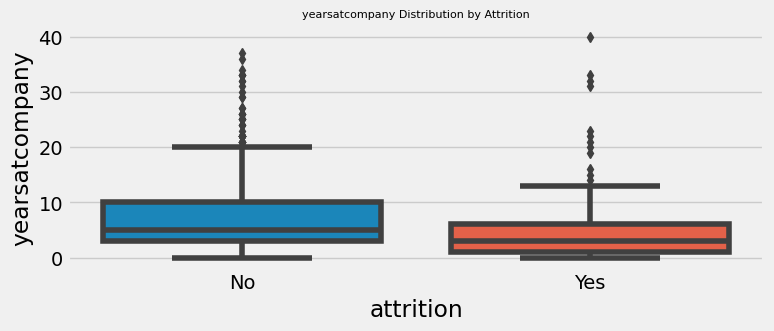

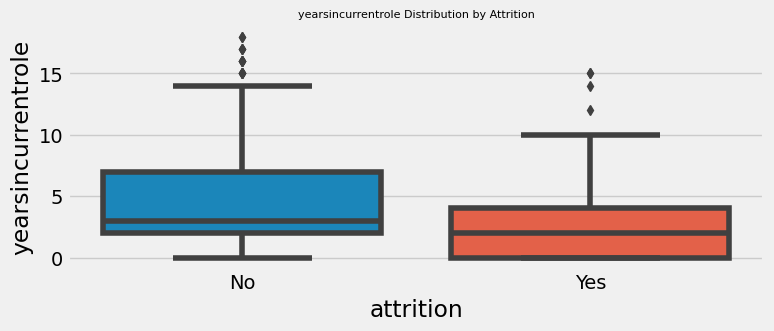

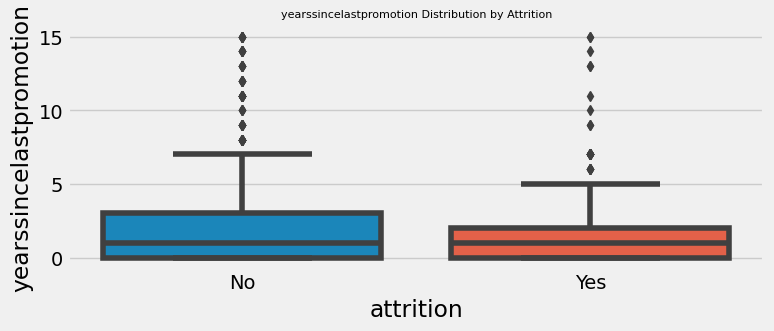

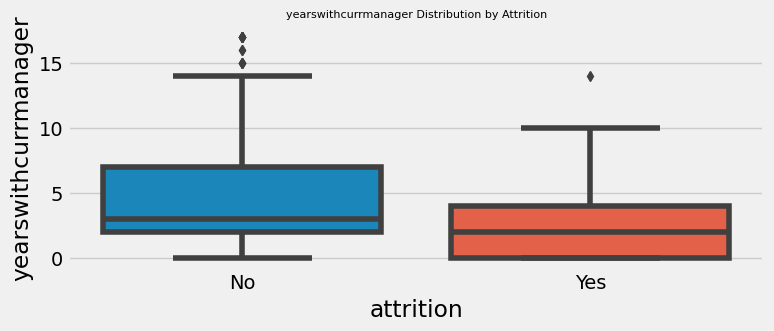

In [ ]:
# Check for outliers
# YOUR CODE HERE
# Identify features with the most divergent distributions based on target class
divergent_features = []
for feature in numerical_columns:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x='attrition', y=feature, data=data)
    plt.title(f'{feature} Distribution by Attrition', fontsize=8)
    plt.show()

### Handling outliers

**Exercise 4: Use lower bound as 25% and upper bound as 75% to handle the outliers [0.5 Mark]**

In [ ]:
# YOUR CODE HERE
for feature in numerical_columns:
    lower_bound = data[feature].quantile(0.25)
    upper_bound = data[feature].quantile(0.75)
    data[feature] = data[feature].apply(lambda x: max(lower_bound, min(upper_bound, x)))


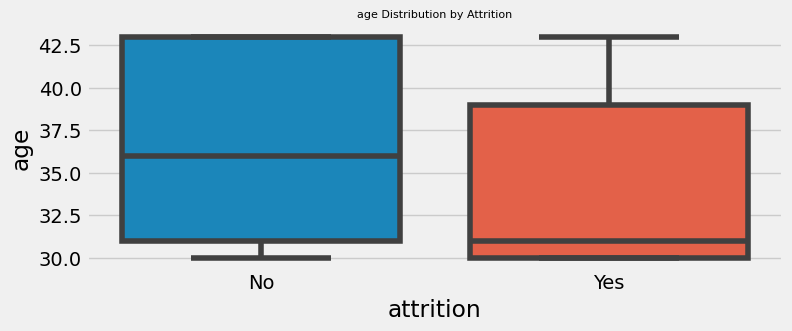

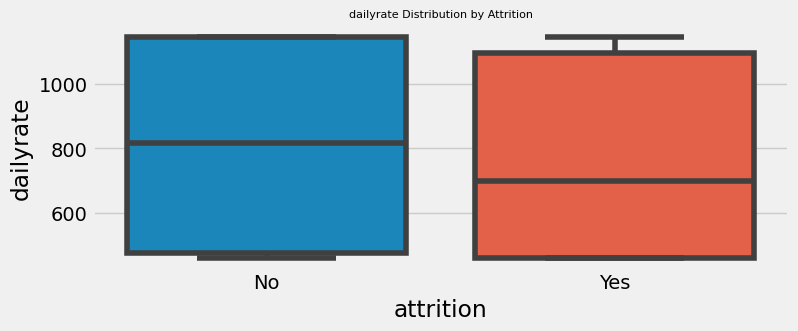

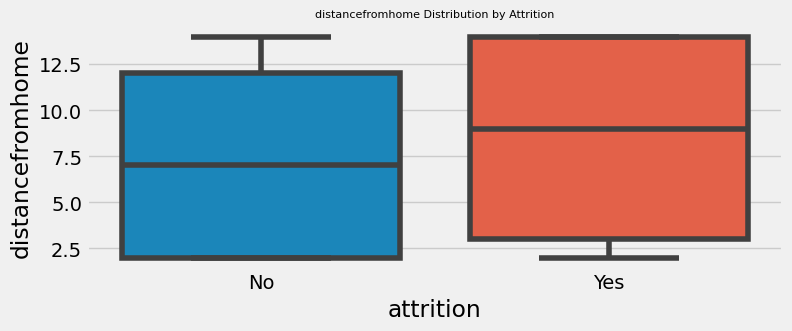

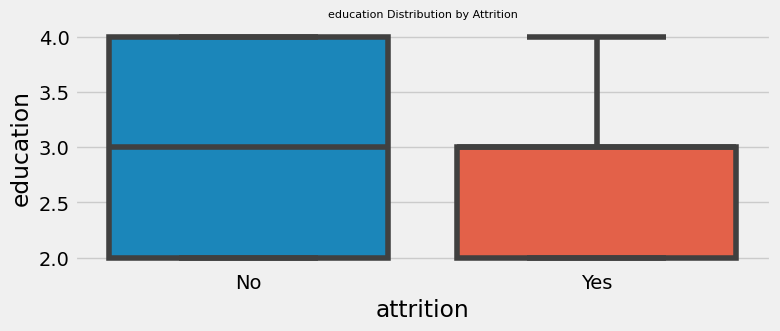

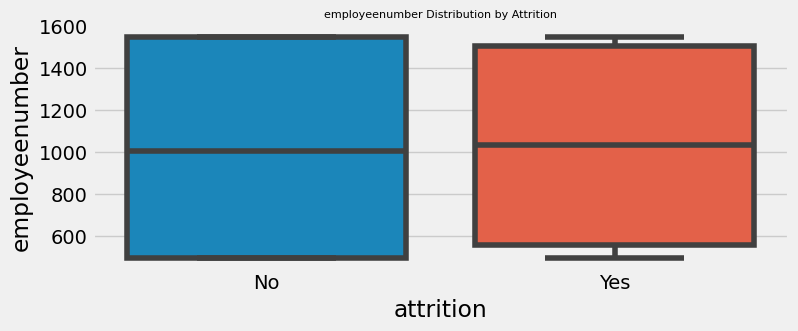

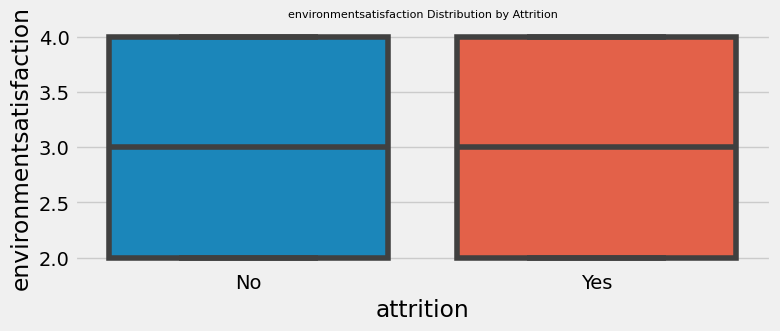

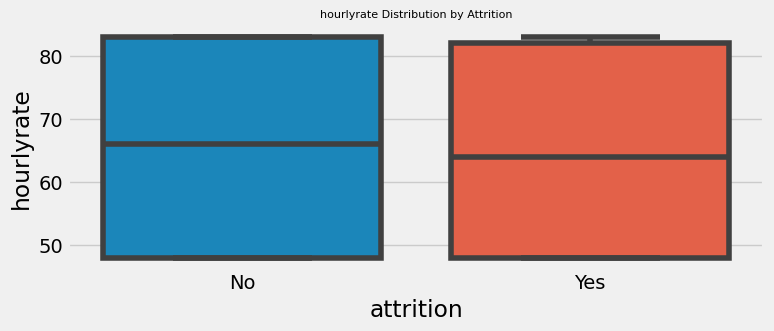

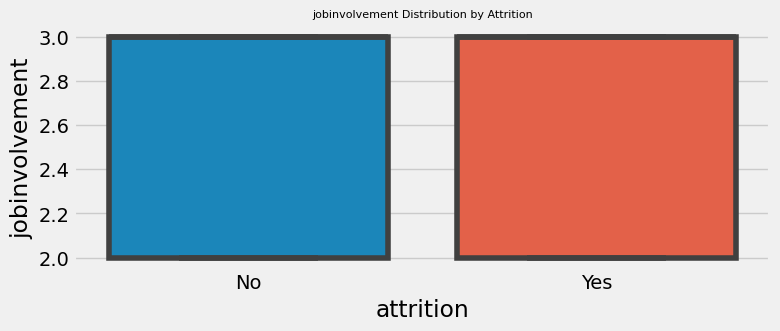

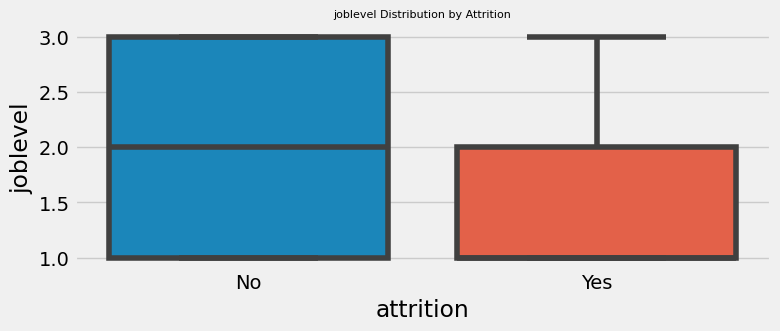

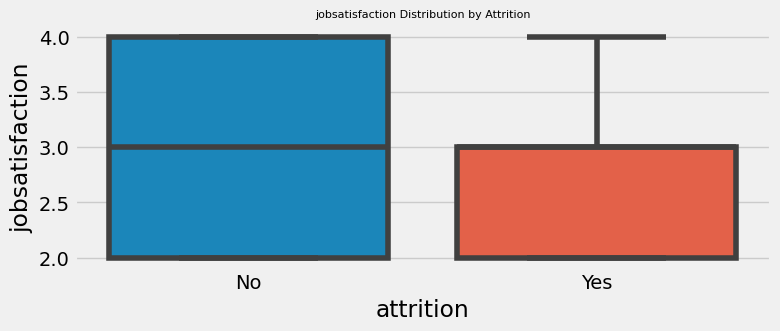

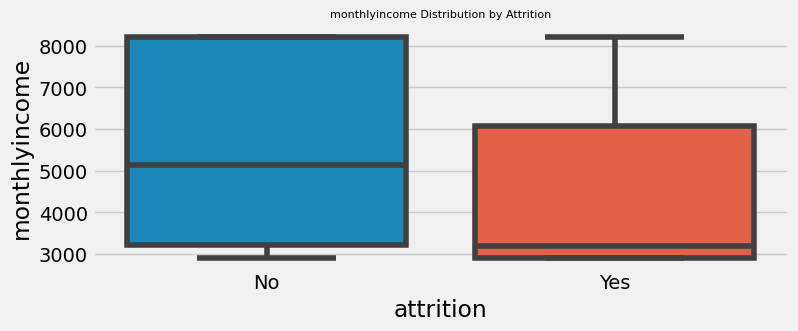

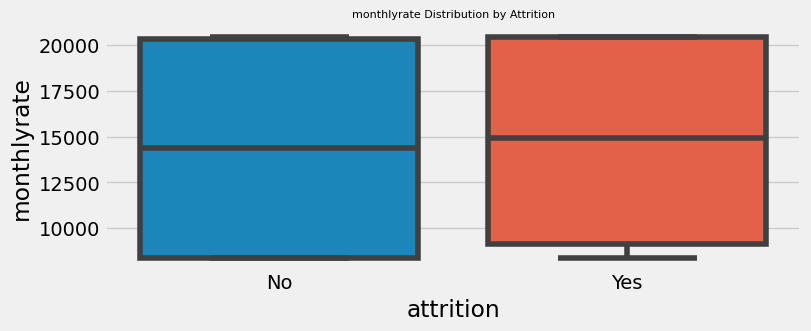

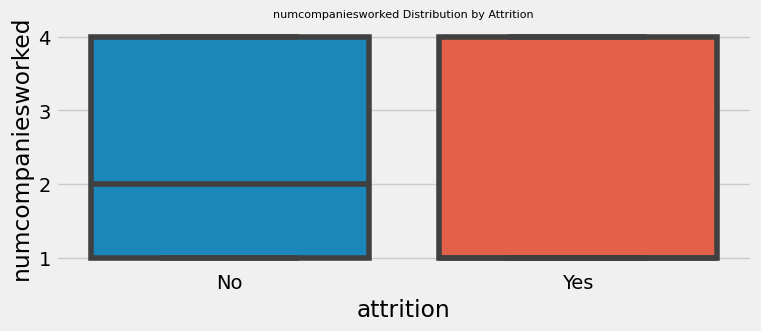

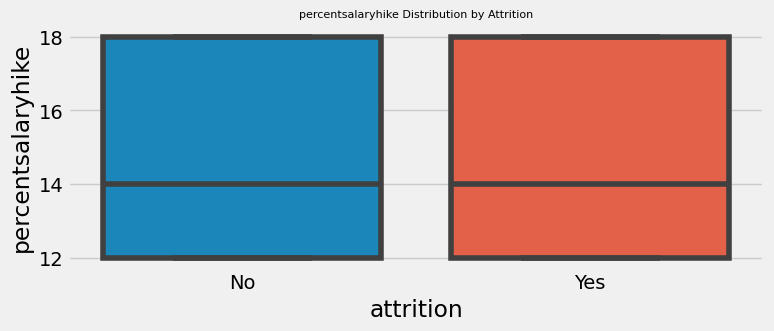

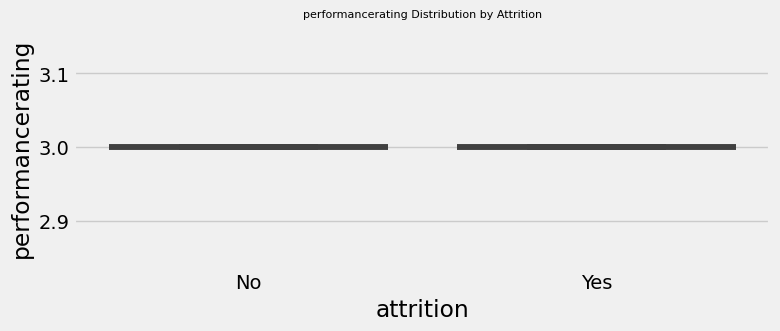

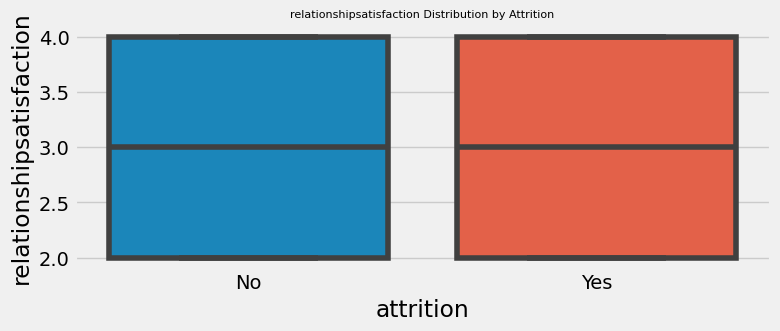

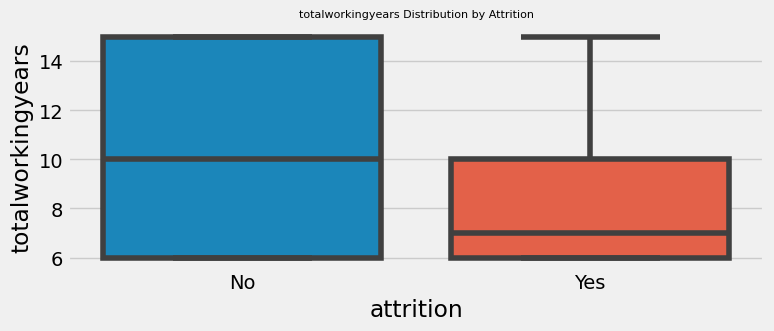

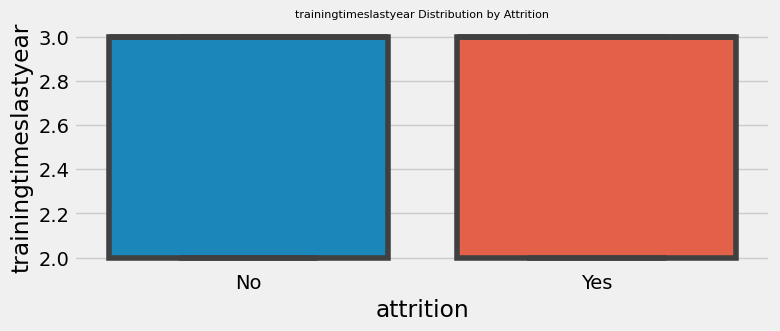

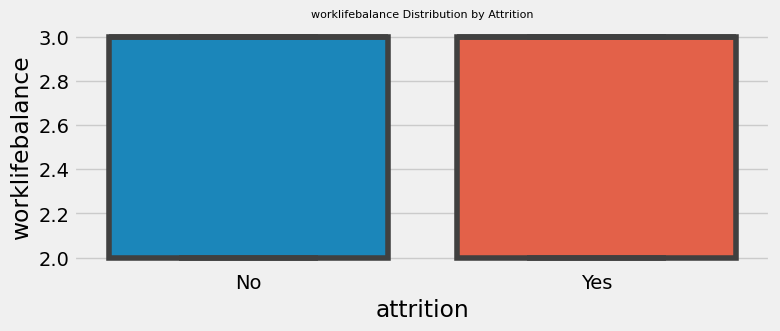

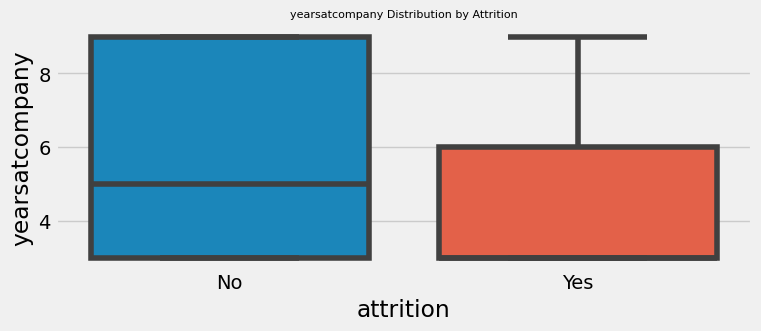

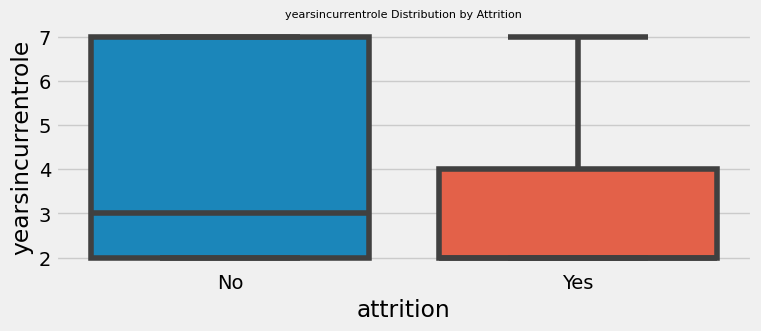

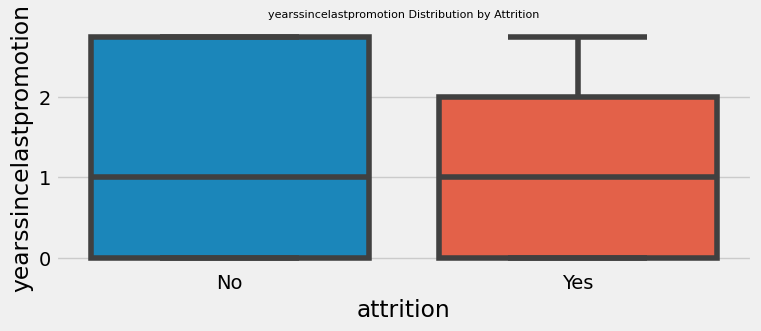

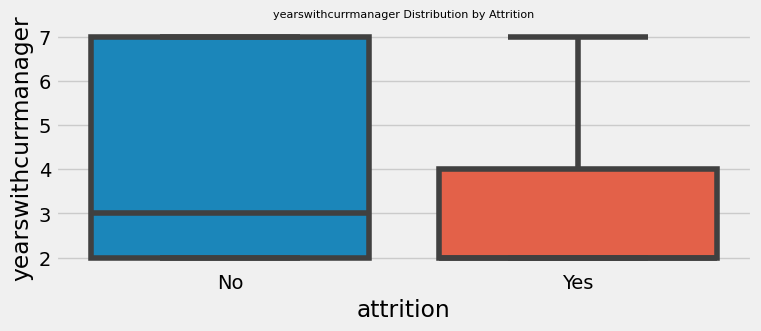

In [ ]:
# Recheck for outliers
# YOUR CODE HERE

# Identify features with the most divergent distributions based on target class
divergent_features = []
for feature in numerical_columns:
    plt.figure(figsize=(8, 3))
    sns.boxplot(x='attrition', y=feature, data=data)
    plt.title(f'{feature} Distribution by Attrition', fontsize=8)
    plt.show()

### Target label imbalance

**Exercise 5: Check if there is an imbalance in target label [0.5 Mark]**

**Hint:** Use value_counts()

In [ ]:
# Count of unique values in Attrition column
# YOUR CODE HERE

# Calculate target label imbalance percentages
target_imbalance = data['attrition'].value_counts()
total_samples = target_imbalance.sum()

percentage_imbalance = (target_imbalance / total_samples) * 100

print("Target Label Imbalance:")
for label, count in target_imbalance.items():
    percentage = percentage_imbalance[label]
    print(f"{label}: {count} samples, {percentage:.2f}%")

Target Label Imbalance:
No: 981 samples, 83.85%
Yes: 189 samples, 16.15%


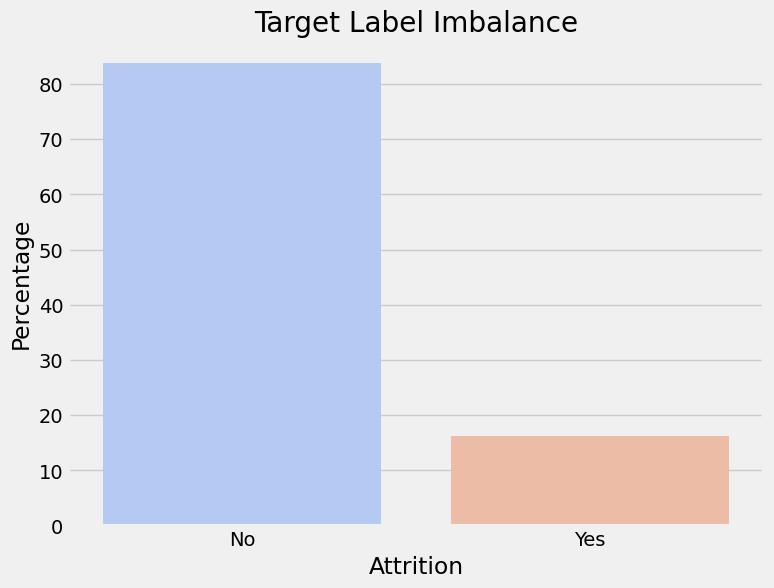

In [ ]:
# Plot barplot to visualize balance/imbalance
# YOUR CODE HERE
# Visualize target label imbalance using a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=percentage_imbalance.index, y=percentage_imbalance.values, palette='coolwarm')
plt.title("Target Label Imbalance")
plt.xlabel("Attrition")
plt.ylabel("Percentage")
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

If there is any imbalance in the dataset then a few techniques can be utilised (optional):
1. SMOTE
2. Cross Validation
3. Regularizing the model's parameters

###Plot pairplot

**Exercise 6: Visualize the relationships between the predictor variables and the target variable using a pairplot [0.5 Mark]**

**Hint:** Use sns.pairplot

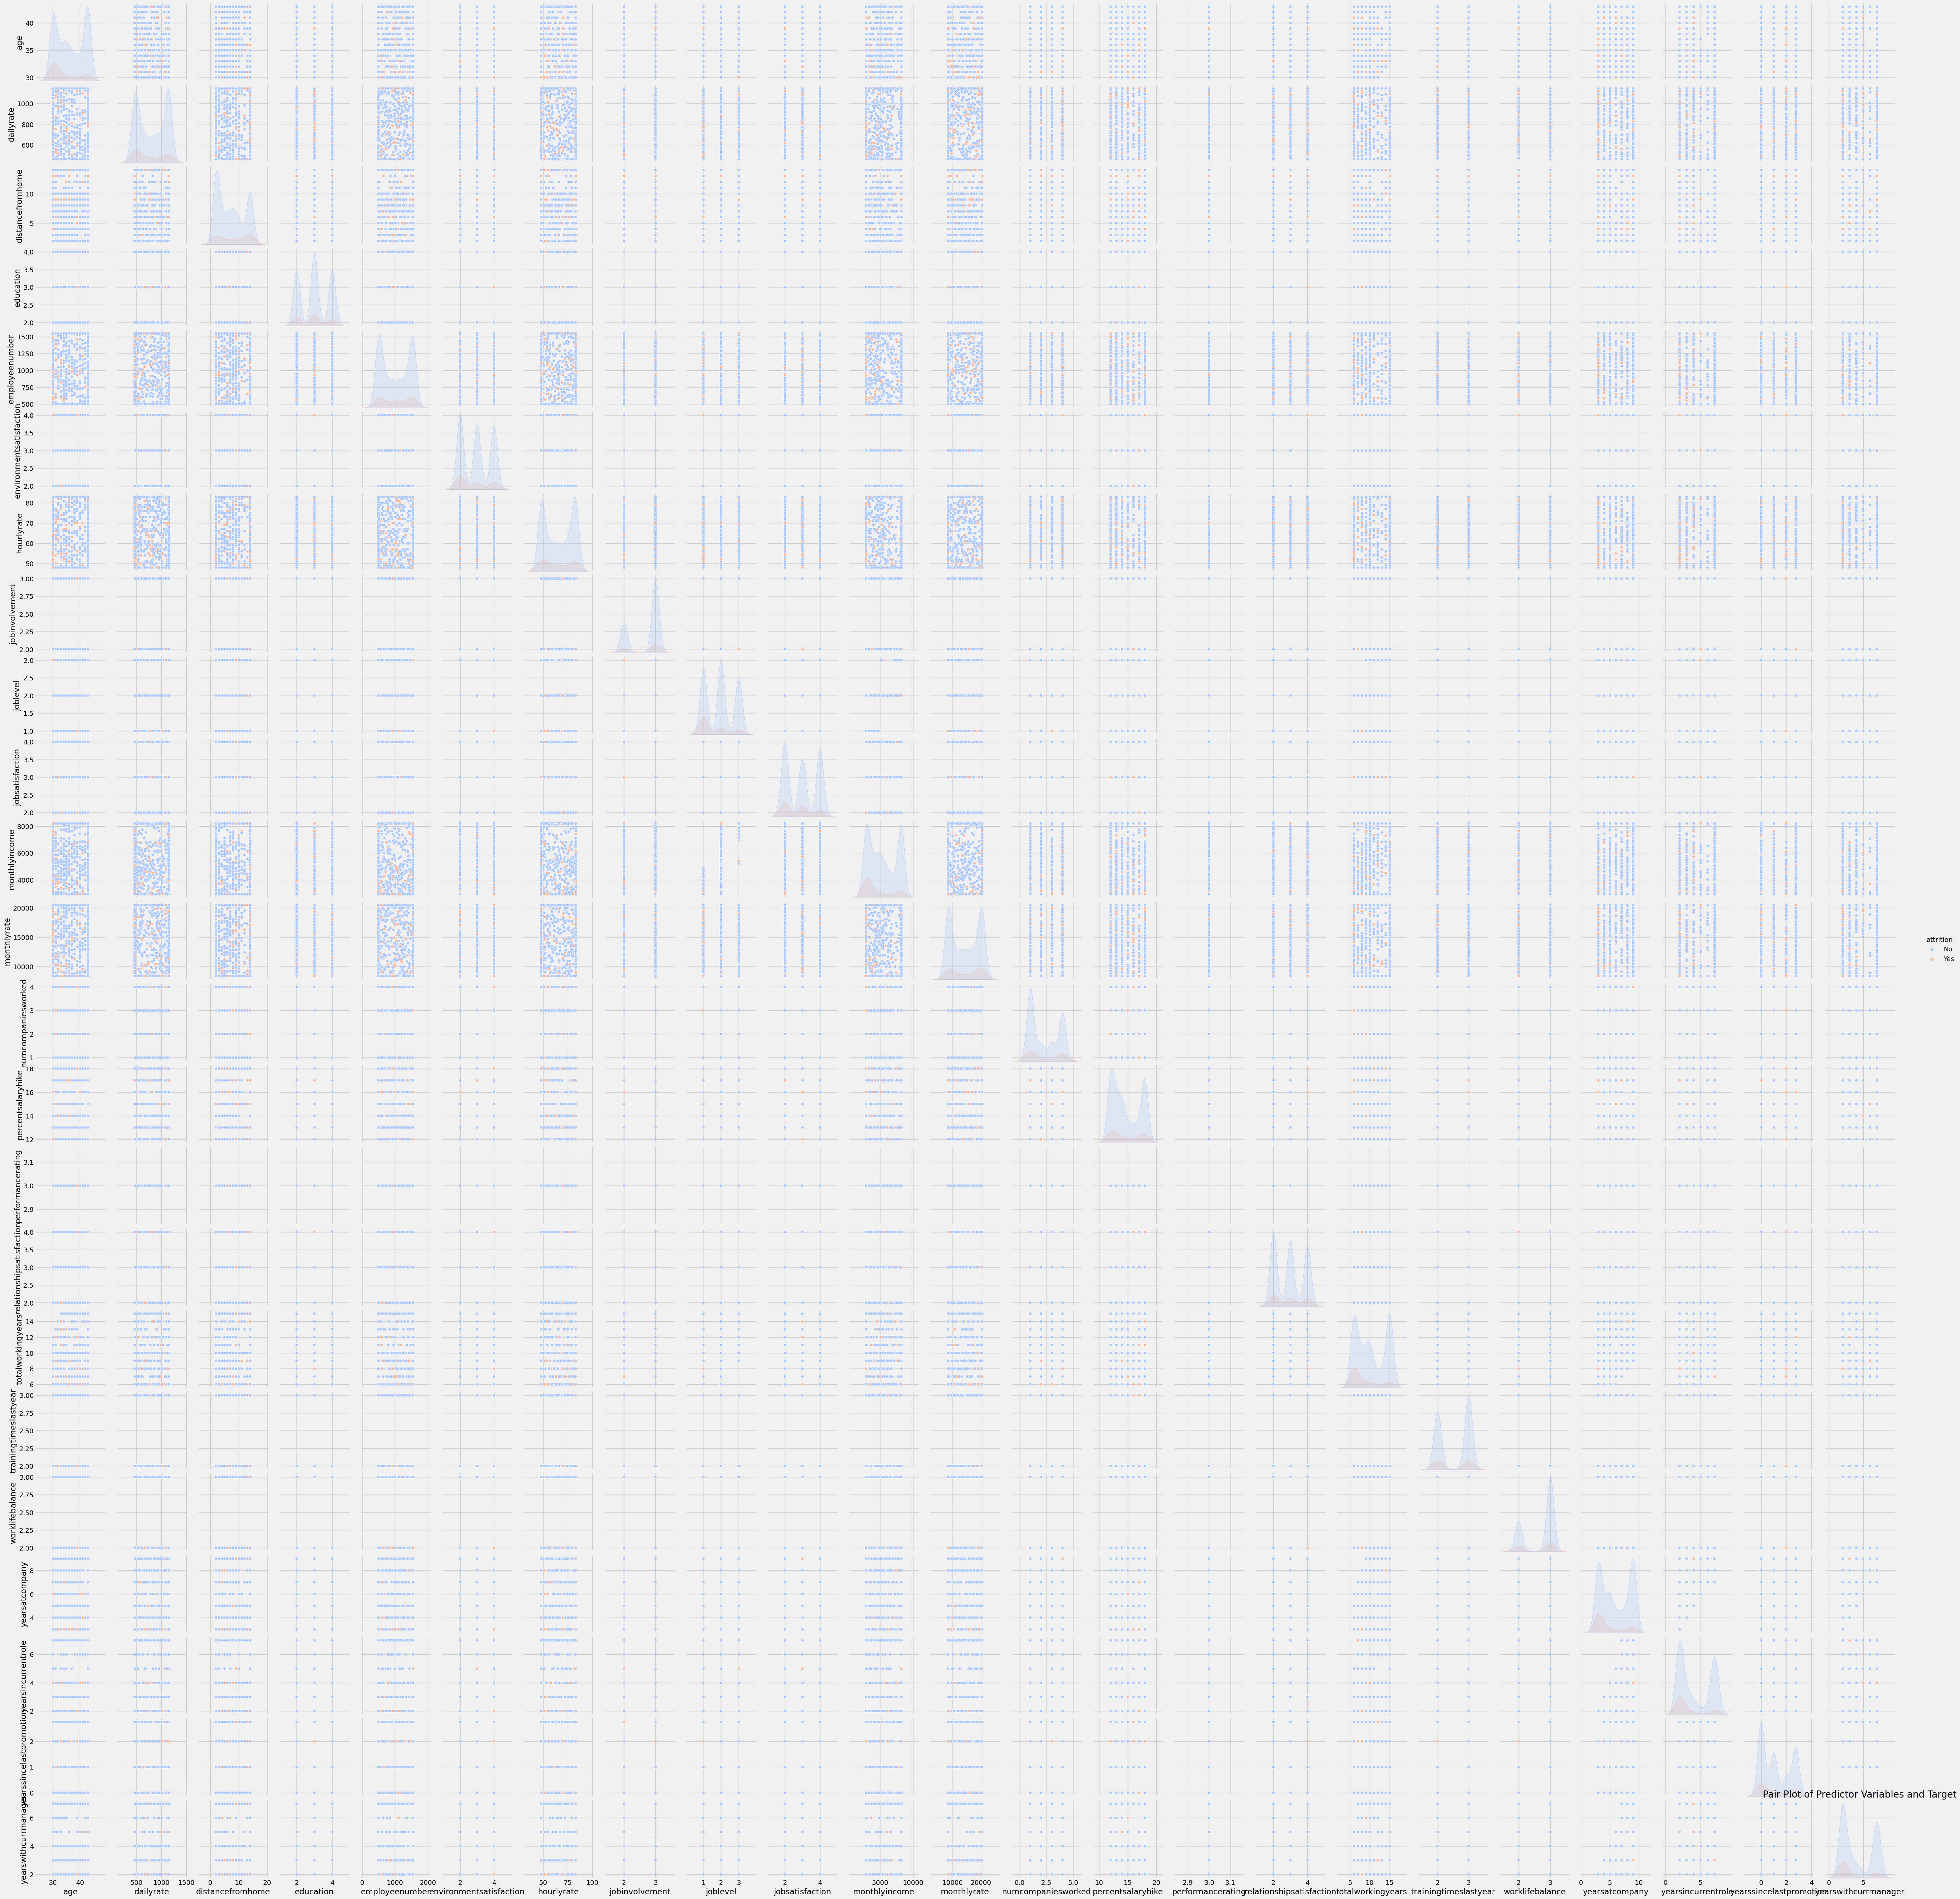

In [ ]:
# Visualize a pairplot with relevant features
# YOUR CODE HERE
# List of predictor variables (excluding the target variable)
predictor_columns = [
    'age', 'dailyrate', 'distancefromhome', 'education', 'employeenumber',
    'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel',
    'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
    'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
    'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
    'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
    'yearswithcurrmanager']

# Add the target variable to the list
predictor_columns.append('attrition')

# Create a pair plot to visualize relationships
sns.pairplot(data[predictor_columns], hue='attrition', diag_kind='kde', palette='coolwarm')
plt.title("Pair Plot of Predictor Variables and Target")
plt.show()

### Explore Correlation

- Plotting the Heatmap

**Exercise 7: Visualize the correlation among IBM employee attrition numerical features using a heatmap [0.5 Mark]**

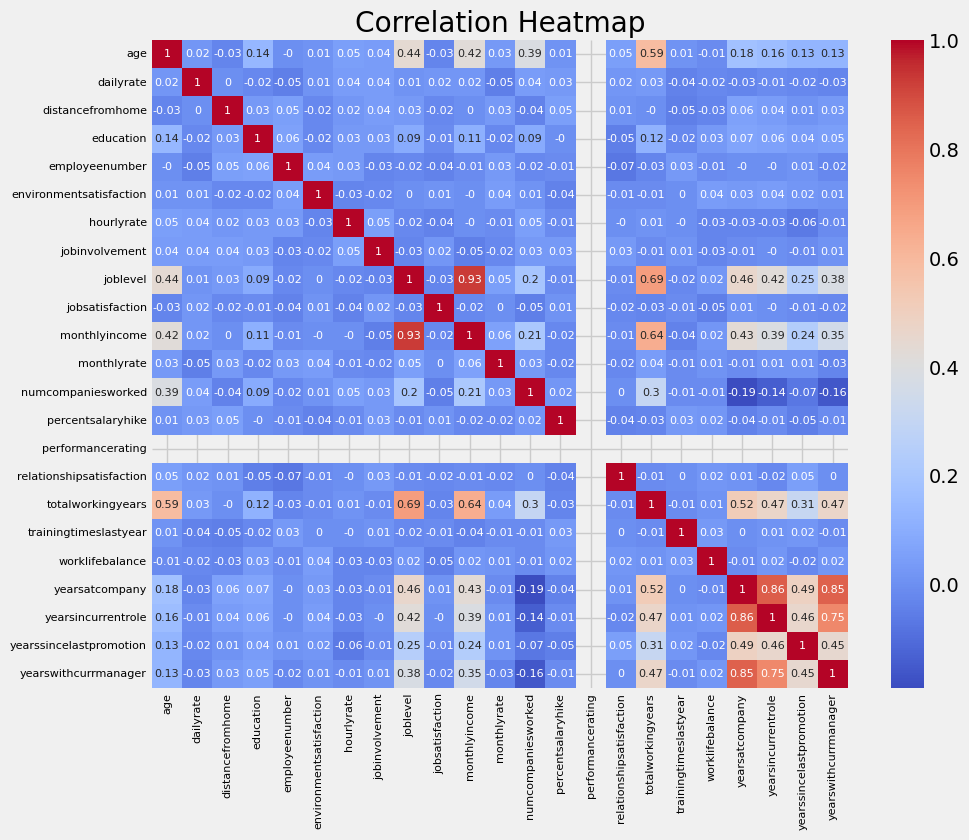

In [ ]:
# Visualize heatmap
# YOUR CODE HERE

# Create a correlation heatmap with reduced font size
correlation_matrix = data[numerical_columns].corr()
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(round(correlation_matrix,2), annot=True, cmap='coolwarm', annot_kws={"size": 8})

# Reduce text size on both x-axis and y-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), size=8)
heatmap.set_yticklabels(heatmap.get_yticklabels(), size=8)

plt.title("Correlation Heatmap")
plt.show()

Comment on the observations made with the pairplot and heatmap

### Preparing the test feature space
* Remove outliers if any
* Handle the categorical feature if required
* Other processing steps can also be followed.

In [ ]:
# Preprocess categorical columns
for column in categorical_columns:
    data[column] = data[column].astype('category')  # Convert to categorical dtype

# Apply one-hot encoding to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)


Optional:
Use `Hyperopt`, a hyperparameter tuning technique to identify the best set of parameters.

Refer to the Additional Notebook: CatBoost parameter tuning (CDS-B4 GDrive -> Module 2 -> Assignments -> Mar 04)

In the notebook, data processing is done separately for different models.
Considering the fact that different models may require data in different format and in turn different processes may be followed to process the data.

If the processing steps followed for the models are same, data processing can also be done once.

## Apply CatBoost

Catboost was released in 2017 by Yandex, showing, by their benchmark to be faster in prediction, better in accuracy, and easier to use for categorical data across a series of GBDT tasks. Additional capabilities of catboost include plotting feature interactions and object (row) importance.

[Here](https://catboost.ai/en/docs/) is the official documentation of CatBoost

### Data Processing for CatBoost

**Exercise 8: Data processing for CatBoost [1 Mark]**
* **Copy the dataframe that was created after removing the outliers**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Column containing the information on attrition will be the target column.

In [ ]:
# Copy the data
# YOUR CODE HERE
df = data_encoded

In [ ]:
df.head()

age  dailyrate  distancefromhome  education  employeecount  \
0  43.0      556.0              14.0        2.0              1   
1  34.0      970.0               8.0        2.0              1   
2  39.0      461.0              14.0        3.0              1   
3  30.0      933.0               2.0        3.0              1   
4  40.0      461.0               2.0        4.0              1   

   employeenumber  environmentsatisfaction  hourlyrate  jobinvolvement  \
0         1548.50                      2.0        83.0             2.0   
1          757.00                      2.0        83.0             3.0   
2         1310.00                      3.0        83.0             3.0   
3          496.25                      3.0        57.0             3.0   
4         1361.00                      2.0        83.0             3.0   

   joblevel  jobsatisfaction  monthlyincome  monthlyrate  numcompaniesworked  \
0       2.0              4.0        5906.00     20456.25                 1.0   
1       2.0              3.0        6142.00      8387.50                 3.0   
2       1.0              2.0        3904.00     20456.25                 1.0   
3       2.0              3.0        5296.00     20156.00                 1.0   
4       1.0              2.0        2914.75      8387.50                 3.0   

  over18  percentsalaryhike  performancerating  relationshipsatisfaction  \
0      Y               13.0                3.0                       4.0   
1      Y               12.0                3.0                       4.0   
2      Y               13.0                3.0                       2.0   
3      Y               17.0                3.0                       2.0   
4      Y               18.0                3.0                       3.0   

   standardhours  totalworkingyears  trainingtimeslastyear  worklifebalance  \
0             80               10.0                    2.0              2.0   
1             80               10.0                    2.0              3.0   
2             80                6.0                    2.0              3.0   
3             80                8.0                    3.0              3.0   
4             80                7.0                    3.0              3.0   

   yearsatcompany  yearsincurrentrole  yearssincelastpromotion  \
0             9.0                 7.0                     2.75   
1             5.0                 2.0                     2.75   
2             5.0                 2.0                     0.00   
3             8.0                 7.0                     2.75   
4             4.0                 2.0                     0.00   

   yearswithcurrmanager attrition  businesstravel_Travel_Frequently  \
0                   7.0        No                                 0   
1                   3.0        No                                 0   
2                   3.0       Yes                                 0   
3                   7.0        No                                 0   
4                   3.0        No                                 0   

   businesstravel_Travel_Rarely  department_Research & Development  \
0                             1                                  1   
1                             1                                  1   
2                             1                                  1   
3                             1                                  0   
4                             1                                  1   

   department_Sales  educationfield_Life Sciences  educationfield_Marketing  \
0                 0                             1                         0   
1                 0                             0                         0   
2                 0                             0                         0   
3                 1                             1                         0   
4                 0                             1                         0   

   educationfield_Medical  ed

In [ ]:
df['over18'] = (df['over18'] == 'Y').astype(int)
df.head()

age  dailyrate  distancefromhome  education  employeecount  \
0  43.0      556.0              14.0        2.0              1   
1  34.0      970.0               8.0        2.0              1   
2  39.0      461.0              14.0        3.0              1   
3  30.0      933.0               2.0        3.0              1   
4  40.0      461.0               2.0        4.0              1   

   employeenumber  environmentsatisfaction  hourlyrate  jobinvolvement  \
0         1548.50                      2.0        83.0             2.0   
1          757.00                      2.0        83.0             3.0   
2         1310.00                      3.0        83.0             3.0   
3          496.25                      3.0        57.0             3.0   
4         1361.00                      2.0        83.0             3.0   

   joblevel  jobsatisfaction  monthlyincome  monthlyrate  numcompaniesworked  \
0       2.0              4.0        5906.00     20456.25                 1.0   
1       2.0              3.0        6142.00      8387.50                 3.0   
2       1.0              2.0        3904.00     20456.25                 1.0   
3       2.0              3.0        5296.00     20156.00                 1.0   
4       1.0              2.0        2914.75      8387.50                 3.0   

   over18  percentsalaryhike  performancerating  relationshipsatisfaction  \
0       1               13.0                3.0                       4.0   
1       1               12.0                3.0                       4.0   
2       1               13.0                3.0                       2.0   
3       1               17.0                3.0                       2.0   
4       1               18.0                3.0                       3.0   

   standardhours  totalworkingyears  trainingtimeslastyear  worklifebalance  \
0             80               10.0                    2.0              2.0   
1             80               10.0                    2.0              3.0   
2             80                6.0                    2.0              3.0   
3             80                8.0                    3.0              3.0   
4             80                7.0                    3.0              3.0   

   yearsatcompany  yearsincurrentrole  yearssincelastpromotion  \
0             9.0                 7.0                     2.75   
1             5.0                 2.0                     2.75   
2             5.0                 2.0                     0.00   
3             8.0                 7.0                     2.75   
4             4.0                 2.0                     0.00   

   yearswithcurrmanager attrition  businesstravel_Travel_Frequently  \
0                   7.0        No                                 0   
1                   3.0        No                                 0   
2                   3.0       Yes                                 0   
3                   7.0        No                                 0   
4                   3.0        No                                 0   

   businesstravel_Travel_Rarely  department_Research & Development  \
0                             1                                  1   
1                             1                                  1   
2                             1                                  1   
3                             1                                  0   
4                             1                                  1   

   department_Sales  educationfield_Life Sciences  educationfield_Marketing  \
0                 0                             1                         0   
1                 0                             0                         0   
2                 0                             0                         0   
3                 1                             1                         0   
4                 0                             1                         0   

   educationfield_Medic

In [ ]:
# Target Column
# YOUR CODE HERE
# Set the target variable
target = 'attrition'

In [ ]:
# Feature Space
# YOUR CODE HERE
predictors = [
    'age', 'dailyrate', 'distancefromhome', 'education', 'employeenumber',
    'environmentsatisfaction', 'hourlyrate', 'jobinvolvement', 'joblevel',
    'jobsatisfaction', 'monthlyincome', 'monthlyrate', 'numcompaniesworked',
    'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
    'totalworkingyears', 'trainingtimeslastyear', 'worklifebalance',
    'yearsatcompany', 'yearsincurrentrole', 'yearssincelastpromotion',
    'yearswithcurrmanager', 'over18'
]

In [ ]:
df

age  dailyrate  distancefromhome  education  employeecount  \
0     43.0     556.00              14.0        2.0              1   
1     34.0     970.00               8.0        2.0              1   
2     39.0     461.00              14.0        3.0              1   
3     30.0     933.00               2.0        3.0              1   
4     40.0     461.00               2.0        4.0              1   
...    ...        ...               ...        ...            ...   
1165  43.0    1146.75              14.0        4.0              1   
1166  43.0     530.00              14.0        2.0              1   
1167  36.0     469.00               3.0        3.0              1   
1168  43.0     849.00              14.0        2.0              1   
1169  43.0    1145.00               9.0        3.0              1   

      employeenumber  environmentsatisfaction  hourlyrate  jobinvolvement  \
0            1548.50                      2.0        83.0             2.0   
1             757.00                      2.0        83.0             3.0   
2            1310.00                      3.0        83.0             3.0   
3             496.25                      3.0        57.0             3.0   
4            1361.00                      2.0        83.0             3.0   
...              ...                      ...         ...             ...   
1165         1548.50                      3.0        64.0             3.0   
1166          496.25                      2.0        83.0             3.0   
1167         1257.00                      3.0        48.0             3.0   
1168         1548.50                      2.0        83.0             2.0   
1169          496.25                      2.0        75.0             2.0   

      joblevel  jobsatisfaction  monthlyincome  monthlyrate  \
0          2.0              4.0        5906.00     20456.25   
1          2.0              3.0        6142.00      8387.50   
2          1.0              2.0        3904.00     20456.25   
3          2.0              3.0        5296.00     20156.00   
4          1.0              2.0        2914.75      8387.50   
...        ...              ...            ...          ...   
1165       2.0              2.0        5467.00      8387.50   
1166       3.0              3.0        8215.25     20456.25   
1167       1.0              2.0        3692.00      9256.00   
1168       2.0              2.0        7991.00     20456.25   
1169       1.0              2.0        3346.00     11873.00   

      numcompaniesworked  over18  percentsalaryhike  performancerating  \
0                    1.0       1               13.0                3.0   
1                    3.0       1               12.0                3.0   
2                    1.0       1               13.0                3.0   
3                    1.0       1               17.0                3.0   
4                    3.0       1               18.0                3.0   
...                  ...     ...                ...                ...   
1165                 4.0       1               18.0                3.0   
1166                 3.0       1               18.0                3.0   
1167                 1.0       1               12.0                3.0   
1168                 4.0       1               15.0                3.0   
1169                 4.0       1               18.0                3.0   

      relationshipsatisfaction  standardhours  totalworkingyears  \
0                          4.0             80               10.0   
1                          4.0             80               10.0   
2                          2.0             80                6.0   
3                          2.0             80                8.0   
4                          3.0             80                7.0   
...                        ...            ...                ...   
1165                       3.0             80               15.0   
1166                       2.0             80               15.

### Model Definition

**Exercise 9: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use CatBoostClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model. Refer [here](https://catboost.ai/en/docs/concepts/speed-up-training) to see some ways to speedup CatBoost training.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
# Split the data into train and test
X = df.drop('attrition', axis = 1)
y = df['attrition']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 2)
x_train_xgb, x_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 2)
x_train_lgbm, x_test_lgbm, y_train_lgbm, y_test_lgbm = train_test_split(X, y, test_size = 0.20, stratify = y, random_state = 2)

In [ ]:
# Model training
# YOUR CODE HERE

from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Create CatBoostClassifier object
CatBoost_clf = CatBoostClassifier(iterations=5, learning_rate=0.1)

# Define hyperparameter grid
param_grid = {
    'iterations': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.3, 0.4, 0.5, 0.8, 0.9],
    'depth': [4, 6, 8],
    # Add other hyperparameters you want to tune here
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=CatBoost_clf, param_grid=param_grid, scoring='accuracy', cv=3)

# Model training
# Comment out the existing CatBoost_clf.fit() as we'll use GridSearchCV to fit the model

# Fit the grid search to the data
grid_search.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=False)

# Get best parameters and best estimator from grid search
best_params = grid_search.best_params_
best_estimator_cb = grid_search.best_estimator_

# Train the model with the best parameters
best_estimator_cb.fit(x_train, y_train, eval_set=(x_test, y_test), verbose=False)


### Model performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE

# Optional: Evaluate the model on test data
accuracy = best_estimator_cb.score(x_test, y_test)
print("Best Hyperparameters:", best_params)
print("Best Model Accuracy:", accuracy)

Best Hyperparameters: {'depth': 4, 'iterations': 20, 'learning_rate': 0.4}
Best Model Accuracy: 0.8461538461538461


## Apply XGBoost

XGBoost is a workhorse gradient boosted decision tree algorithm. Its been around since 2014 and has come to dominate the Kaggle and data science community. XGB introduced gradient boosting where new models are fit to the residuals of prior models and then added together, using a gradient descent algorithm to minimize the loss.

Read [here](https://xgboost.readthedocs.io/en/stable/parameter.html) on XGBoost parameters.

Refer [here](https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier) for the official documentation of XGBoost classifier.

### Data Processing for XGBoost


**Exercise 10: Data Processing for XGBoost [1 Mark]**
* **Copy the dataframe after the outliers were removed.**
* **Handle the categorical features if required**
* **Create target column and feature space**

**Hint:** Use pd.get_dummies

When creating the dummy variables, the name of attrition column was changed, rename to 'attrition' again.

**Hint:** Use .rename

### Model Definition

**Exercise 11: Define, train the model and display the results [2 Mark]**

**Hint:**
* Use XGBClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Create XGBClassifier object
XGB_clf = XGBClassifier(learning_rate=0.1)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 4],
    'min_child_weight': [1, 2],
    'gamma': [0, 0.1],
    'subsample': [0.9, 1.0],
    'colsample_bytree': [0.9, 1.0]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=XGB_clf, param_grid=param_grid, scoring='accuracy', cv=3)

# Convert 'attrition' variable to numerical (0 or 1)
y_train_xgb = (y_train_xgb == 'Yes').astype(int)
y_test_xgb = (y_test_xgb == 'Yes').astype(int)

# Perform grid search and model training
grid_search.fit(x_train_xgb, y_train_xgb)

# Get best parameters and best estimator from grid search
best_params = grid_search.best_params_
best_estimator_xgb = grid_search.best_estimator_

# Train the model with the best parameters
best_estimator_xgb.fit(x_train_xgb, y_train_xgb, eval_set=[(x_train_xgb, y_train_xgb), (x_test_xgb, y_test_xgb)], verbose=False)

# Optional: Evaluate the model on test data
accuracy = best_estimator_xgb.score(x_test_xgb, y_test_xgb)
print("Best Hyperparameters:", best_params)
print("Best Model Accuracy:", accuracy)


Best Hyperparameters: {'colsample_bytree': 1.0, 'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 1.0}
Best Model Accuracy: 0.8418803418803419


In [ ]:
y_test

968      No
1124     No
262      No
478      No
897      No
       ... 
890      No
447      No
590      No
482     Yes
361      No
Name: attrition, Length: 234, dtype: object

### Model Performance

In [ ]:
# Model performance on all sets
# YOUR CODE HERE

# Get the cross-validation results from grid search
cv_results = grid_search.cv_results_

# Print the accuracy for each fold of the cross-validation
#for i in range(len(cv_results['params'])):
   # print(f"Fold {i + 1} - Accuracy: {cv_results['mean_test_score'][i]:.4f}")

# Print the best hyperparameters
print("Best Hyperparameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

    # Prediction using XGBClassifier
XGB_prediction = best_estimator_xgb.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test_xgb, XGB_prediction))



Best Hyperparameters:
colsample_bytree: 1.0
gamma: 0
max_depth: 3
min_child_weight: 1
n_estimators: 150
subsample: 1.0
Accuracy Score:  0.8418803418803419


## Apply LightGBM (Optional)

LightGBM is an open-source GBDT framework created by Microsoft as a fast and scalable alternative to XGB and GBM. By default LightGBM will train a Gradient Boosted Decision Tree (GBDT), but it also supports random forests, Dropouts meet Multiple Additive Regression Trees (DART), and Gradient Based One-Side Sampling (Goss).

To know more about LightGBM parameters, refer [here](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html#lightgbm.LGBMClassifier).

### Feature Engineering for LightGBM

### Model Definition

**Hint:**
* Use LGBMClassifier() to define the model with relevant parameters.
* Use `fit` to fit the data to the model.
* Evaluate the model using roc_auc_score, accuracy_score, f1_score, predict methods or other relevant techniques.

In [ ]:
## Following the same procedure as followed in XGBoost

import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

# Create LightGBM Classifier object
LGBM_clf = lgb.LGBMClassifier(boosting_type='gbdt', num_leaves=31, learning_rate=0.1, verbosity=-1)

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4],
    'min_child_samples': [10, 20],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=LGBM_clf, param_grid=param_grid, scoring='accuracy', cv=3)

# Convert 'attrition' variable to numerical (0 or 1)
y_train_lgbm = (y_train_lgbm == 'Yes').astype(int)
y_test_lgbm = (y_test_lgbm == 'Yes').astype(int)

# Fit the grid search to the training data
grid_search.fit(x_train, y_train)

# Get best parameters and best estimator from grid search
best_params = grid_search.best_params_
best_estimator_lgbm = grid_search.best_estimator_

# Train the model with the best parameters
best_estimator_lgbm.fit(x_train_lgbm, y_train_lgbm, eval_set=[(x_train_lgbm, y_train_lgbm), (x_test_lgbm, y_test_lgbm)])

# Optional: Evaluate the model on test data
accuracy_lgbm = best_estimator_lgbm.score(x_test_lgbm, y_test_lgbm)
print("Best Hyperparameters:", best_params)
print("Best Model Accuracy:", accuracy_lgbm)


Best Hyperparameters: {'colsample_bytree': 0.8, 'max_depth': 3, 'min_child_samples': 10, 'n_estimators': 100, 'subsample': 0.8}
Best Model Accuracy: 0.8418803418803419


### Model performance

## Results

**Exercise 12: Create a dataframe of XGBoost results and CatBoost results and display them [0.5 Mark]**

**Hint:** Use pd.DataFrame

In [ ]:
# Create a dataframe for computed metrics for different models
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score

# Make predictions on test data for each model
y_pred_cb = best_estimator_cb.predict(x_test)
y_pred_xgb = best_estimator_xgb.predict(x_test_xgb)

# Convert predicted labels to integers
#y_pred_catboost = (y_pred_catboost == 'Yes').astype(np.int)

# Calculate accuracy for each model
accuracy_cb = accuracy_score(y_test, y_pred_cb)
accuracy_xgb = accuracy_score(y_test_xgb, y_pred_xgb)

# Create a dataframe to store the computed metrics
metrics_df = pd.DataFrame({
    'Model': ['CatBoost', 'XGBoost', 'LGBM'],
    'Accuracy': [accuracy_cb, accuracy_xgb, accuracy_lgbm]
})

# Print or display the metrics dataframe
print(metrics_df)


      Model  Accuracy
0  CatBoost  0.846154
1   XGBoost  0.841880
2      LGBM  0.841880


In [ ]:
y_pred_xgb

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Reference reading:
1. https://machinelearningmastery.com/xgboost-for-imbalanced-classification/

In [ ]:
# downloaded the test data from kaggle and uploaded manually
test_for_submission = pd.read_csv('hr_employee_attrition_test.csv')

#PRE-PROCESSING
# Preprocess categorical columns
for column in categorical_columns:
    test_for_submission[column] = test_for_submission[column].astype('category')  # Convert to categorical dtype

# Apply one-hot encoding to categorical columns
data_encoded_kaggle = pd.get_dummies(test_for_submission, columns=categorical_columns, drop_first=True)

data_encoded_kaggle['over18'] = (data_encoded_kaggle['over18'] == 'Y').astype(int)

# Assuming 'id' is the name of the column you want to remove for predictions
id_column = data_encoded_kaggle['id']  # Store the 'id' column

# Remove the 'id' column from the input data
data_encoded_kaggle.drop(columns=['id'], inplace=True)
predictions = best_estimator_xgb.predict(data_encoded_kaggle)

# Create a DataFrame for predictions with 'id' column
predictions_df = pd.DataFrame({
    'id': id_column,  # Add back the 'id' column
    'label': predictions})

# Save the predictions DataFrame to a CSV file
predictions_df.to_csv('predictions_xgb.csv', index=False)

In [ ]:
# downloaded the test data from kaggle and uploaded manually
test_for_submission = pd.read_csv('hr_employee_attrition_test.csv')

#PRE-PROCESSING
# Preprocess categorical columns
for column in categorical_columns:
    test_for_submission[column] = test_for_submission[column].astype('category')  # Convert to categorical dtype

# Apply one-hot encoding to categorical columns
data_encoded_kaggle = pd.get_dummies(test_for_submission, columns=categorical_columns, drop_first=True)

data_encoded_kaggle['over18'] = (data_encoded_kaggle['over18'] == 'Y').astype(int)

# Assuming 'id' is the name of the column you want to remove for predictions
id_column = data_encoded_kaggle['id']  # Store the 'id' column

# Remove the 'id' column from the input data
data_encoded_kaggle.drop(columns=['id'], inplace=True)
predictions = best_estimator_cb.predict(data_encoded_kaggle)

# Create a DataFrame for predictions with 'id' column
predictions_df = pd.DataFrame({
    'id': id_column,  # Add back the 'id' column
    'label': predictions})

# Create a mapping dictionary
attrition_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the 'Attrition' column
predictions_df['label'] = predictions_df['label'].map(attrition_mapping)

# Save the predictions DataFrame to a CSV file
predictions_df.to_csv('predictions_cb.csv', index=False)

In [ ]:
# downloaded the test data from kaggle and uploaded manually
test_for_submission = pd.read_csv('hr_employee_attrition_test.csv')

#PRE-PROCESSING
# Preprocess categorical columns
for column in categorical_columns:
    test_for_submission[column] = test_for_submission[column].astype('category')  # Convert to categorical dtype

# Apply one-hot encoding to categorical columns
data_encoded_kaggle = pd.get_dummies(test_for_submission, columns=categorical_columns, drop_first=True)

data_encoded_kaggle['over18'] = (data_encoded_kaggle['over18'] == 'Y').astype(int)

# Assuming 'id' is the name of the column you want to remove for predictions
id_column = data_encoded_kaggle['id']  # Store the 'id' column

# Remove the 'id' column from the input data
data_encoded_kaggle.drop(columns=['id'], inplace=True)
predictions = best_estimator_lgbm.predict(data_encoded_kaggle)

# Create a DataFrame for predictions with 'id' column
predictions_df = pd.DataFrame({
    'id': id_column,  # Add back the 'id' column
    'label': predictions})

# Create a mapping dictionary
attrition_mapping = {'Yes': 1, 'No': 0}

# Apply the mapping to the 'Attrition' column
predictions_df['label'] = predictions_df['label'].map(attrition_mapping)

# Save the predictions DataFrame to a CSV file
predictions_df.to_csv('predictions_lgbm.csv', index=False)